# 워드클라우드(Word Cloud)
사용 데이터: **IMDB 영화감상평 데이터셋**

## Load pacakges

In [10]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud

from nltk import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hyewon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hyewon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load Dataset
IMDB dataset에서 train 데이터의 positive review 데이터만 이용하여 word cloud 생성

In [2]:
dataset = tf.keras.utils.get_file(fname = 'imdb.tar.gz',
                                 origin = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
                                 extract = True)

In [3]:
base_dir = os.path.dirname(dataset)
print(base_dir)

C:\Users\hyewon\.keras\datasets


In [5]:
def make_dict(dir):
    data = {}
    data['txt'] = []
    
    for i in os.listdir(dir):
        path = os.path.join(dir, i)
        rst = open(path, 'r', encoding = 'utf-8').read()
        data['txt'].append(rst)
        
    return pd.DataFrame.from_dict(data)

train_pos = make_dict(os.path.join(base_dir, 'aclImdb', 'train', 'pos'))

In [8]:
stop = nltk.corpus.stopwords.words('english')
text = ' '.join(train_pos['txt'])

## Word Cloud 
 + max_font_size: 가장 큰 폰트 사이즈 지정
 + stopwords: word cloud 안에 포함하지 않을 stopword 지정
 + background_color: 뒷 배경색 지정

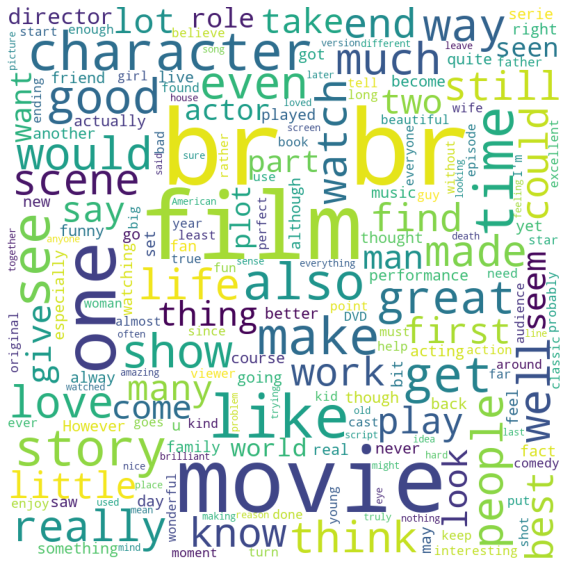

In [9]:
wc = WordCloud(max_font_size = 150, 
               stopwords = stop, 
               background_color = 'white', 
               width = 800, 
               height = 800)
wc.generate(text)

plt.figure(figsize = (10, 8))
plt.imshow(wc)
plt.tight_layout(pad = 0)
plt.axis('off')
plt.show()

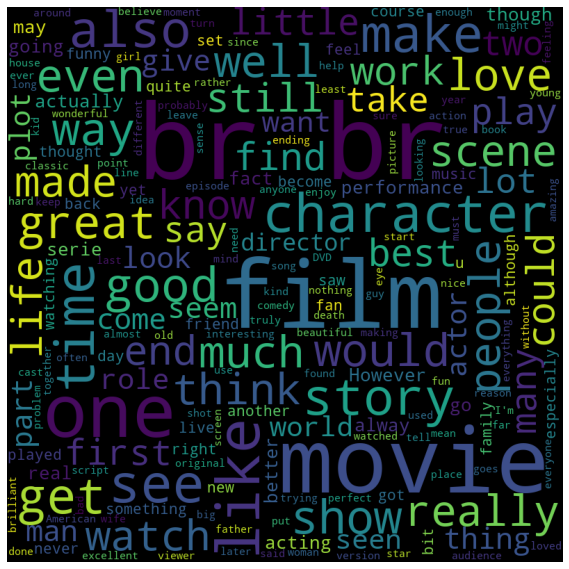

In [12]:
# word cloud 배경색을 검은색으로 변경
wc1 = WordCloud(max_font_size = 150, 
                stopwords = stop, 
                background_color = 'black', 
                width = 800, 
                height = 800)
wc1.generate(text)

plt.figure(figsize = (10, 8))
plt.imshow(wc1)
plt.tight_layout(pad = 0)
plt.axis('off')
plt.show()

## Customize colors of words
사용자정의 함수를 이용하여 word cloud에 들어가는 단어들의 색상을 지정할 수 있다.
<br>
(색상 참고 사이트: <https://www.w3schools.com/colors/colors_picker.asp>)
 + `recolor`: 사용자지정 word color을 word cloud에 적용하는 함수

In [13]:
# rgb color 모두 사용한 사용자지정 색
def make_colors(word, font_size, position, orientation, random_state, **kwargs):
    r = random_state.randint(0, 255)
    g = random_state.randint(0, 255)
    b = random_state.randint(0, 255)
    color = "rgb(%d, %d, %d)"%(r,g,b)
    return color

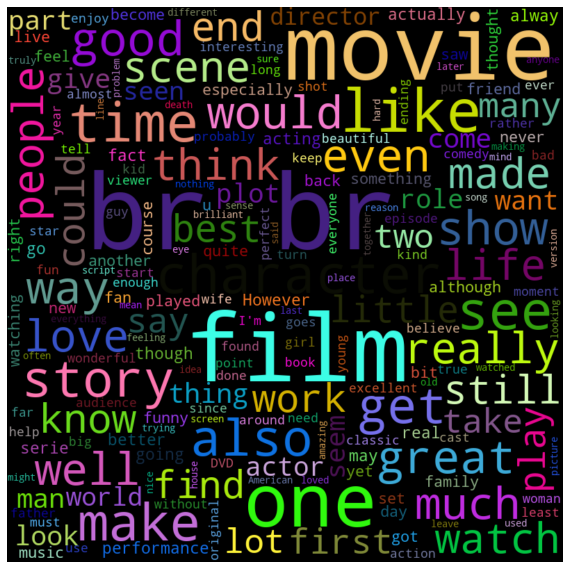

In [16]:
wc2 = WordCloud(max_font_size = 150, 
                stopwords = stop, 
                background_color = 'black', 
                width = 800, 
                height = 800)

wc2.generate(text)
recolor = wc2.recolor(color_func = make_colors, random_state = True) 

plt.figure(figsize = (10, 8))
plt.imshow(recolor, interpolation = 'bilinear')
plt.tight_layout(pad = 0)
plt.axis('off')
plt.show()

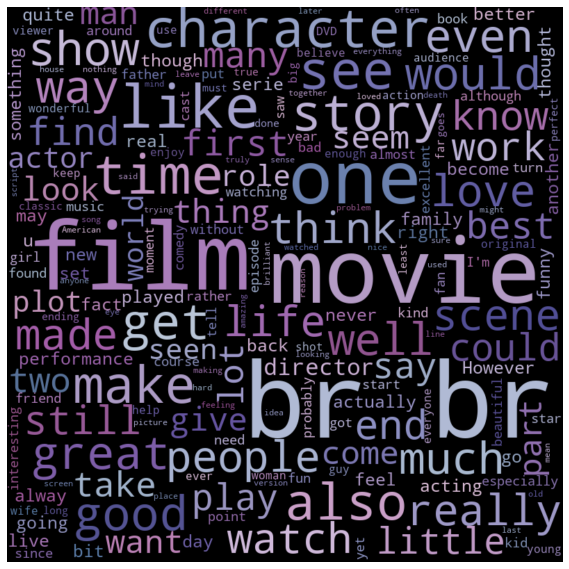

In [36]:
def purple_colors(word, font_size, position, orientation, random_state = None, **kwargs):
    return("hsl({:d}, {:d}%, {:d}%)".format(np.random.randint(212, 313), np.random.randint(26, 32), np.random.randint(45, 80)))

wc2 = WordCloud(max_font_size = 150, 
                stopwords = stop, 
                background_color = 'black', 
                width = 800, 
                height = 800)

wc2.generate(text)
recolor = wc2.recolor(color_func = purple_colors, random_state = True) 

plt.figure(figsize = (10, 8))
plt.imshow(recolor, interpolation = 'bilinear')
plt.tight_layout(pad = 0)
plt.axis('off')
plt.show()

## Masking
Word cloud 에서는 mask image라는 것을 활용해 word cloud의 형태를 다양하게 변경 가능하다. 아래는 가장 유명한 mask인 이상한나라의 앨리스 mask 이다. Mask를 사용하려면 WordCloud 함수 안에 `mask`에 mask image를 지정해주면 된다.

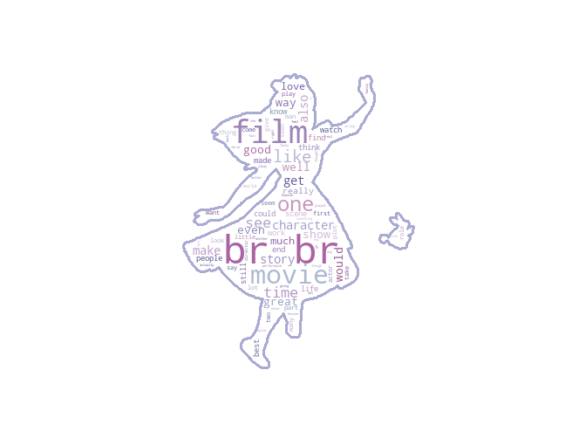

In [38]:
from PIL import Image

mask_img = np.array(Image.open('mask.png'))


wc3 = WordCloud(max_font_size = 150, 
                stopwords = stop, 
                background_color = 'white', 
                width = 800, 
                height = 800,
                mask = mask_img,
                contour_color = '#AAABD3',
                contour_width = 3)

wc3.generate(text)
recolor = wc3.recolor(color_func = purple_colors, random_state = True) 

plt.figure(figsize = (10, 10))
plt.imshow(recolor, interpolation = 'bilinear')
plt.axis('off')
plt.show()